<a href="https://colab.research.google.com/github/Shindora/NLP-with-PyTorch/blob/master/Chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn

class Perceptron(nn.Module):
  """A perceptron is one linear layer"""
  def __init__(self,input_dim):
    """
    Args:
        input_dim(int): size of the input features
    """
    super(Perceptron, self).__init__()
    self.fcl = nn.Linear(input_dim, 1)

  def forward(self, x_in):
    """
    The forward pass of the perceptron
    Args:
      x_in(torch.Tensor): an input data tensor
          x_in.shape should be (batch, num_features)
    Returns:
      the resulting tensor. tensor.shape should be (batch,).
    """
    return torch.sigmoid(self,fc1(x_in)).squeeze()
    
   

# Activation Functions

## Sigmoid

One of the earliest used activation functions in neural network history. It takes any real value and squashes it into the range between 0 and 1.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  This is separate from the ipykernel package so we can avoid doing imports until


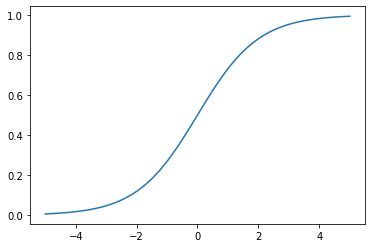

In [0]:
import torch
import matplotlib.pyplot as plt
x= torch.range(-5.,5.,0.1)
y= torch.sigmoid(x)
plt.plot(x.numpy(),y.numpy())
plt.show() 

## Tanh

The tanh activation function is a cosmetically different variant of the sigmoid.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  This is separate from the ipykernel package so we can avoid doing imports until


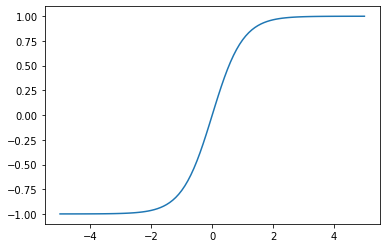

In [0]:
import torch
import matplotlib.pyplot as plt
x= torch.range(-5.,5.,0.1)
y= torch.tanh(x)
plt.plot(x.numpy(),y.numpy())
plt.show() 

## ReLU

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  after removing the cwd from sys.path.


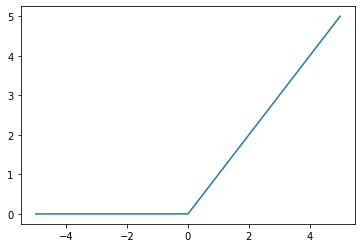

In [0]:
import torch
import matplotlib.pyplot as plt
relu = torch.nn.ReLU()
x= torch.range(-5.,5.,0.1)
y = relu(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

## Parametric ReLU (PReLU) activation functions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  """


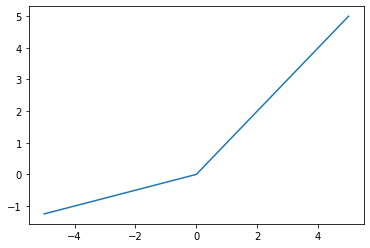

In [0]:
import torch
import matplotlib.pyplot as plt

prelu = torch.nn.PReLU(num_parameters=1)
x= torch.range(-5.,5.,0.1)
y = prelu(x)

plt.plot(x.numpy(), y.detach().numpy())
plt.show()

## Softmax

In [0]:
import torch.nn as nn
import torch

softmax = nn.Softmax(dim=1)
x_input = torch.randn(1, 3)
y_output = softmax(x_input)
print(x_input)
print(y_output)
print(torch.sum(y_output, dim=1))

tensor([[ 1.2188, -1.2172, -1.3019]])
tensor([[0.8562, 0.0749, 0.0688]])
tensor([1.])


# Loss Functions


## Mean Squared Error Loss



In [0]:
import torch
import torch.nn as nn
mse_loss = nn.MSELoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.randn(3, 5)
loss = mse_loss(outputs, targets)
print(loss)


tensor(1.9060, grad_fn=<MseLossBackward>)


## Categorical Cross-Entropy Loss

The categorical cross­entropy loss is typically used in a multiclass classification setting in which the
outputs are interpreted as predictions of class membership probabilities

In [0]:
import torch
import torch.nn as nn
ce_loss = nn.CrossEntropyLoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.tensor([1, 0, 3], dtype=torch.int64)
loss = ce_loss(outputs, targets)
print(loss)


tensor(2.0834, grad_fn=<NllLossBackward>)


Binary Cross-Entropy Loss
## Binary Cross-Entropy Loss


In [0]:
bce_loss = nn.BCELoss()
sigmoid = nn.Sigmoid()
probabilities = sigmoid(torch.randn(4, 1, requires_grad=True))
targets = torch.tensor([1, 0, 1, 0], dtype=torch.float32).view(4, 1)
loss = bce_loss(probabilities, targets)
print(probabilities)
print(loss)


# Diving Deep into Supervised Training


Constructing Toy Data

Choosing a Model

Converting The Probabilities To Discrete Classes

Choosing a Loss Function

Choosing an Optimized

In [0]:
"""Adam optimizer"""
import torch.nn as nn
import torch.optim as optim
input_dim = 2
lr = 0.001
perceptron = Perceptron(input_dim=input_dim)
bce_loss = nn.BCELoss()
optimizer = optim.Adam(params=perceptron.parameters(), lr=lr)


Putting It Together: Gradient-Based Supervised Learning

In [0]:
"""A supervised training loop for a perceptron and binary classification """
# each epoch is a complete pass over the training data
for epoch_i in range(n_epochs):
# the inner loop is over the batches in the dataset
for batch_i in range(n_batches):
# Step 0: Get the data
x_data, y_target = get_toy_data(batch_size)
# Step 1: Clear the gradients
perceptron.zero_grad()
# Step 2: Compute the forward pass of the model
y_pred = perceptron(x_data, apply_sigmoid=True)
# Step 3: Compute the loss value that we wish to optimize
loss = bce_loss(y_pred, y_target)
# Step 4: Propagate the loss signal backward
loss.backward()
# Step 5: Trigger the optimizer to perform one update
optimizer.step()